In [ ]:
# Import modules
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import itertools
from itertools import combinations
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Provide the link to share the file/folder located on Google Drive.
link ='https://drive.google.com/file/d/1jRhCexfgTfDRAuFaJ2miZMdHbqxTV0Ca/view?usp=sharing'
# Extract the ID of the file
id = link.split("/")[-2]
# Create and load the dataset
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('appstore_games.csv') 

In [ ]:
# Load original dataset as dataframe
df = pd.read_csv('appstore_games.csv')
display(df.head())

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


The data represents 17,007 rows and 18 columns sourced from [Kaggle](https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games). In doing this project, there are several things that we would like to know. Knowing these aspects would be of assistance for mobile app developers, because this would enable them to understand which areas they should prioritize or focus on for further development.

As such, we can devise the following problem formulation:

***

### Problem Formulation

1. What are the most popular genre combinations?
2. What is the oldest app, and how many years/months?
3. What is the app that receives the latest update?
4. What variables affect app rating?
5. How do microtransactions affect rating?
6. What variables affect age restrictions? 


## 1. Exploratory Data Analysis


> To begin with, we engage in exploratory data analysis to gain an understanding of the data's appearance. The primary purpose of exploratory data analysis is to observe initial patterns and trends in the data by creating informative figures and graphs. EDA also aids in assessing data quality, examining data distribution, and detecting any outliers or missing values.



To gain an understanding of the data, we can start by displaying an overview of the dataframe using the `df.info()` function.


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

## 1.1. Description of the dataset column

We provide descriptions for each column in the dataset. This ensures that we interpret the data accurately by understanding the meaning and representation of each column. Such understanding is vital for drawing meaningful conclusions and making accurate interpretations based on the dataset.
*   `URL`: Uniform Resource Locator is a specific web address that allows users to access and retrieve information or resources from a server.
*   `ID`: The unique identifier number that is associated with the app.
*   `Name`: The title or name by which the app is commonly known.
*   `Subtitle`: The secondary text displayed under the app's name
*   `Icon URL`: The URL of the app's icon in JPG format, sized at 512px x 512px.
*   `Average User Rating`: The average rating of the app from users, rounded to the nearest 0.5
*   `User Rating Count`: The count of ratings received by the app from users. If the value is "null" means number of ratings is below 5.
*   `Price`: The cost to download the app (USD)
*   `In-app Purchases`: The pricing details for the various purchases that are available within the app.
*   `Description`: A brief explanation or summary of the app's features, functionality, and purpose.
*   `Developer`: The one who responsible for creating and developing the app.
*   `Age Rating`: The recommended age at the app is considered appropriate for usage.
*   `Languages`: The language codes that represent the languages in which the app is available.
*   `Size`: The amount of storage space occupied by the app, measured in bytes.
*   `Primary Genre`: The main or primary category or genre to which the app belongs.
*   `Genres`: The app's classification based on primary functionality, purpose, or theme.
*   `Original Release Date`: The date on which the app was made available to the public.
*   `Current Version Release`: The most recent date on which the app received updates or enhancements.


We adjust the dataset by eliminating duplicate data to ensure that there are no repeated entries in the dataset.

In [ ]:
df = df.drop_duplicates()

Next, we check if the dataset contain null value.
Null Values can be replace with the data mean, median, mode or fill with some value.

In [ ]:
df.isna().any()

URL                             False
ID                              False
Name                            False
Subtitle                         True
Icon URL                        False
Average User Rating              True
User Rating Count                True
Price                            True
In-app Purchases                 True
Description                     False
Developer                       False
Age Rating                      False
Languages                        True
Size                             True
Primary Genre                   False
Genres                          False
Original Release Date           False
Current Version Release Date    False
dtype: bool

It is noticeable that several columns have missing values. In the next section, we will address these missing values based on the characteristics and patterns of the data.


## 1.2. Replace Null Values

---

For the `Average User Rating`, `User Rating Count`,`Price` and `In-app Purchases` . It is possible for an application to have received no ratings, despite being both free and did not have any in-app purchases.




In [ ]:
df['Average User Rating'] = df['Average User Rating'].fillna(0)
df['User Rating Count'] = df['User Rating Count'].fillna(0)
df['Price'] = df['Price'].fillna(0)
df['In-app Purchases'] = df['In-app Purchases'].fillna(0.0)

We substitute the null value with English for the language, as English is the [*lingua franca*](https://languagejustice.wordpress.com/2020/07/07/english-and-the-software-development-lingua-franca/) of software development.


In [ ]:
df['Languages'] = df['Languages'].fillna('EN')

Following that, we inspect the column before filling in the null value. This is done by making a histogram graph for `Size`.

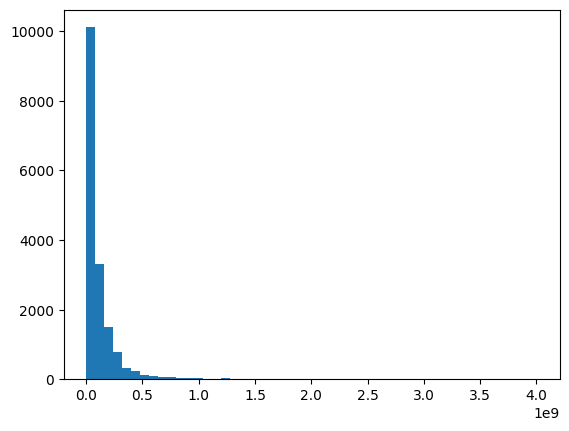

In [ ]:
plt.hist(df['Size'],bins=50)
plt.show()

Based on the graph, it is evident that the graph form a right-skewed distribution. When dealing with right-skewed data, the median is often preferred as a measure of central tendency over the mean. 

The reason behind this is that the mean is highly sensitive to extreme values, such as outliers, which can have a significant impact on its calculation and potentially distort the overall interpretation of the data. In contrast, the median is less affected by extreme values and offers a more reliable representation of the typical or central value of the dataset.


Hence, we fill the null values in the dataset with the median value, aiming to retain the integrity of the data without introducing significant changes.

In [ ]:
df['Size'] = df['Size'].fillna(df['Size'].median())

## 1.3. Data Cleaning

---
In the dataset, there are certain columns that require adjustments to prepare them for future analysis. The first one is `Subtitle`. As we can see the column contain subtitle on each app, and considering the possibility of certain applications lacking a subtitle. So, we assume the null value means there is no subtitle.

In [ ]:
df.Subtitle

0                                   NaN
1                                   NaN
2                                   NaN
3                                   NaN
4                                   NaN
                      ...              
17002    Blast the cubes, solve puzzle!
17003                               NaN
17004                               NaN
17005                  Most fun game!!!
17006                               NaN
Name: Subtitle, Length: 16847, dtype: object

In [ ]:
df.Subtitle = df.Subtitle.fillna('No Subtitle')

In the `subtitle` column, we notice that the column values represent the subtitles for each application. In order to narrow it down, we will modify the `subtitle` column to only contain a value indicating whether the application has a subtitle or not.


To standardize the data in the `subtitle` column, we modify the values by replacing the existing subtitle entries with the term `Has Subtitle`. This ensures consistency in the representation of subtitles across the dataset.

In [ ]:
df.Subtitle = ['Has Subtitle' if i != 'No Subtitle' else 'No Subtitle' for i in df.Subtitle]
df.Subtitle.value_counts()

No Subtitle     11635
Has Subtitle     5212
Name: Subtitle, dtype: int64

Next, we move on to the `In-app Purchases`. We initiate the process by splitting the string in the 'In-app Purchases' column at each comma (`,`) since it contains multiple price values stored as a string.

Furthermore, we proceed to replace the null values in the `In-app Purchases` column with `0.00`, assuming that the absence of values indicates that the app is completely free without any additional purchases.


In [ ]:
df['In-app Purchases'] = [i.split(', ') if type(i) == str else i for i in df['In-app Purchases']]
df['In-app Purchases'] = df['In-app Purchases'].fillna(0.00)

# Check the data
print(df['In-app Purchases'])

0                        0.0
1                        0.0
2                        0.0
3                        0.0
4                        0.0
                ...         
17002                    0.0
17003                    0.0
17004                    0.0
17005    [9.99, 49.99, 3.99]
17006                    0.0
Name: In-app Purchases, Length: 16847, dtype: object


We can see in the `In-app Purchases`, except the null value that we already fill with 0, has a list type, so we want to assign all the value to list, later we can iterate over the list from `In-app Purchases` column to change the data type from string to float

In [ ]:
df['In-app Purchases'] = [i if type(i) == list else [i] for i in df['In-app Purchases']]
df['In-app Purchases'] = [[float(j) for j in i] for i in df['In-app Purchases']]

# Check the data
print(df['In-app Purchases'])

0                      [0.0]
1                      [0.0]
2                      [0.0]
3                      [0.0]
4                      [0.0]
                ...         
17002                  [0.0]
17003                  [0.0]
17004                  [0.0]
17005    [9.99, 49.99, 3.99]
17006                  [0.0]
Name: In-app Purchases, Length: 16847, dtype: object


We iterate through `In-app Purchases` column and `index` in dataframe where `i` represents the `In-app Purchases` value and `j` represents the dataframe index.
Then we replace every row in `In-app Purchases` with the mean of that row (e.g., [0.99] --> 0.99, [1.99,4.99] --> 3.49)


In [ ]:
for i,j in zip(df['In-app Purchases'],df.index):
    df.loc[j , 'In-app Purchases'] = np.mean(i)

In [ ]:
#check the data
df['In-app Purchases'][4:20]

4          0.0
5         1.99
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15        0.99
17         0.0
18    2.132857
19        0.99
20         0.0
Name: In-app Purchases, dtype: object

In the `age rating` column, we remove the (`+`) sign as part of the data preprocessing. This is done to facilitate future analysis of the `age rating` column which we will convert into a categorical column with ordered values. By stripping the (`+`) sign, we ensure that the age ratings can be properly categorized and ranked in the desired format.

In [ ]:
df['Age Rating'] = df['Age Rating'].str.replace('+','').astype(int)

<ipython-input-273-ccdc9f5594c9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Age Rating'] = df['Age Rating'].str.replace('+','').astype(int)


Given that English is considered the international language and based on our examination of the dataset, we can assume that the majority of games in the App Store are designed for English-speaking users. Consequently, we filter the apps that have the English language code 'EN'.

In [ ]:
df.Languages = ['English' if 'EN' in i else 'Non English' for i in df.Languages]
df.Languages.value_counts()

English        16736
Non English      111
Name: Languages, dtype: int64

Given that non-English App is only 111 (or approximately 0.65% of the data) of the dataset, it is reasonable to consider using only the applications with English language for future analysis. The exclusion of non-English data, which less than 1% of the dataset, is justifiable as it minimally affects the overall analysis while allowing for a more focused examination of English-language applications.


In order to facilitate future analysis, we create a variable called `current_dateTime` with the present datetime for later datetime aggregation purposes.

In [ ]:
current_dateTime = pd.to_datetime(datetime.now())

To convert the data types of the `Original Release Date` and `Current Version Release Date` columns from object to datetime, we can utilize the `.astype('datetime64[ns]')` method. This will ensure that these columns are treated as datetime values.

In [ ]:
df['Original Release Date'] = df['Original Release Date'].astype('datetime64[ns]')
df['Current Version Release Date'] = df['Current Version Release Date'].astype('datetime64[ns]')

<ipython-input-276-8f2af702f230>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Original Release Date'] = df['Original Release Date'].astype('datetime64[ns]')
<ipython-input-276-8f2af702f230>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Current Version Release Date'] = df['Current Version Release Date'].astype('datetime64[ns]')


In [ ]:
# Check the output
print(df['Original Release Date'].dtype)
print(df['Current Version Release Date'].dtype)

datetime64[ns]
datetime64[ns]


## 2. What are the most popular genre combinations?

To identify popular genre combinations, the initial step is to split the values in the `genre` column at each comma `,`. This will separate the genre combinations.

In [ ]:
df.Genres

0                       Games, Strategy, Puzzle
1                        Games, Strategy, Board
2                        Games, Board, Strategy
3                       Games, Strategy, Puzzle
4             Games, Strategy, Board, Education
                          ...                  
17002    Games, Entertainment, Casual, Strategy
17003                   Games, Family, Strategy
17004                           Games, Strategy
17005                   Games, Strategy, Action
17006                   Games, Strategy, Puzzle
Name: Genres, Length: 16847, dtype: object

In [ ]:
df.Genres = df['Genres'].apply(lambda x: x.split(", "))
genre = df.Genres

In [ ]:
genre

0                       [Games, Strategy, Puzzle]
1                        [Games, Strategy, Board]
2                        [Games, Board, Strategy]
3                       [Games, Strategy, Puzzle]
4             [Games, Strategy, Board, Education]
                           ...                   
17002    [Games, Entertainment, Casual, Strategy]
17003                   [Games, Family, Strategy]
17004                           [Games, Strategy]
17005                   [Games, Strategy, Action]
17006                   [Games, Strategy, Puzzle]
Name: Genres, Length: 16847, dtype: object

Next, we can count the occurrences of genre combinations using a loop.

In [ ]:
# Initializes an empty Counter object called d.
d  = Counter()
for sub in genre:
# checks if the length of the current element (sub) is less than 2. 
    if len(sub) < 2:
# If it is, the continue statement skips the remaining code for this iteration and moves to the next element.
        continue
# Sorts the sub list in ascending order
    sub.sort()
# Creates a loop that iterates over a range of values from 2 to the length of the sub list.
    for sz in range(2, len(sub)+1):
# Iterates over all the combinations of sz elements from the sub list.
        for comb in combinations(sub, sz):
# Increments the counter for each combination (comb) in the d dictionary.
            d[comb] += 1

After counting the occurrences of genre combinations, we can use the `most_common()` function to determine the top 10 genres. This will provide us with the genres that appear most frequently in the dataset.


[`most_common()`](https://docs.python.org/3/library/collections.html#collections.Counter.most_common) is a class method in the `Counter()` object.

In [ ]:
top_10_genre = d.most_common()[:10]
print(top_10_genre)

[(('Games', 'Strategy'), 16846), (('Entertainment', 'Games'), 7916), (('Entertainment', 'Strategy'), 7916), (('Entertainment', 'Games', 'Strategy'), 7916), (('Games', 'Puzzle'), 3919), (('Puzzle', 'Strategy'), 3919), (('Games', 'Puzzle', 'Strategy'), 3919), (('Games', 'Simulation'), 2124), (('Simulation', 'Strategy'), 2123), (('Games', 'Simulation', 'Strategy'), 2123)]


To present the top 10 genres in a structured format, we can create a DataFrame to display the results. This DataFrame will contain the genre names and their corresponding frequencies.

In [ ]:
# Initialize empty list
genres = []
count = []
# To separate the keys (genre names) and values (frequencies) and store them in individual empty lists.
for i in top_10_genre:
    genres.append(i[0])
    count.append(i[1])

To enhance the comprehensibility of the genre names, we can add an `&` between each genre combination. Additionally, we can merge all the top 10 combinations into a single list. This will result in a more concise representation of the popular genre combinations.


---


Since the most common genre combinations in the top 10 involve either 3 or 2 genres, we can iterate through the list of genre combinations and separate them into groups of 3 and 2 genres. This will allow us to handle the different combinations more effectively.


In [ ]:
# Initialize empty list
genre_list = []
for i in genres:
    new = ''
    i = list(i)
    if len(i) == 3:
        new = i[0]+' & '+i[1]+' & '+i[2]
        genre_list.append(new)
    else:
        new = i[0]+' & '+i[1]
        genre_list.append(new)

print(genre_list)

['Games & Strategy', 'Entertainment & Games', 'Entertainment & Strategy', 'Entertainment & Games & Strategy', 'Games & Puzzle', 'Puzzle & Strategy', 'Games & Puzzle & Strategy', 'Games & Simulation', 'Simulation & Strategy', 'Games & Simulation & Strategy']


Assing to a new DataFrame object.

In [ ]:
top_10_genres = pd.DataFrame({'count': count}, index=genre_list)

Plot the data.

Text(0, 0.5, 'Total')

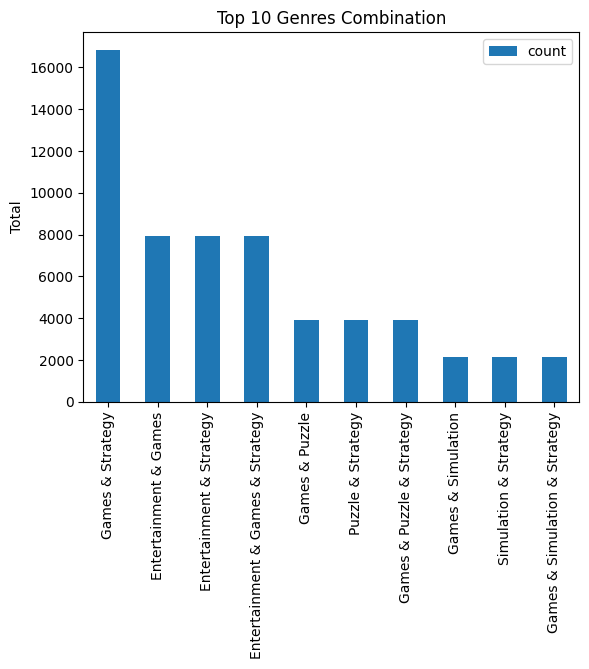

In [ ]:
ax = top_10_genres.plot.bar(rot=90)
ax.set_title('Top 10 Genres Combination')
ax.set_ylabel('Total')

##3. What is the oldest app, and how many years or months?


The initial step to discover the oldest application involves calculating the difference between the `current_dateTime` and the `Original release Date` then assign it to `Original release days`.


After converting the data into a timedelta format, we proceed to extract the number of days from it.

In [ ]:
df['Original release days'] = current_dateTime - df['Original Release Date']
df['Original release days'] = pd.to_timedelta(df['Original release days']).dt.days
# Check the output
print(df['Original release days'])

0        5319
1        5319
2        5319
3        5426
4        5431
         ... 
17002    1402
17003    1605
17004    1546
17005    1605
17006    1574
Name: Original release days, Length: 16847, dtype: int64


To find the release time in months, we can calculate it by subtracting the `current_dateTime` from the `Original Release Date` using the `.dt.to_period('M')` method. This calculation helps us determine the number of months the application has been released.

In [ ]:
df['Original release months'] = current_dateTime.to_period('M') - df['Original Release Date'].dt.to_period('M')
# Apply a lambda function, extracting the numerical values
df['Original release months'] = df['Original release months'].apply(lambda x: x.n)
# Check the output
print(df['Original release months'])

0        175
1        175
2        175
3        179
4        179
        ... 
17002     47
17003     53
17004     51
17005     53
17006     52
Name: Original release months, Length: 16847, dtype: int64


The same approach can be used to determine the duration of the app's release in years. By subtracting the `Original Release Date` from the `current_dateTime` using the `.dt.to_period('Y')` method, we can calculate the number of years since the app was first launched.

In [ ]:
df['Original release years'] = current_dateTime.to_period('Y') - df['Original Release Date'].dt.to_period('Y')
# Apply a lambda function, extracting the numerical values
df['Original release years'] = df['Original release years'].apply(lambda x: x.n)
# Check the output
print(df['Original release years'])

0        15
1        15
2        15
3        15
4        15
         ..
17002     4
17003     4
17004     4
17005     4
17006     4
Name: Original release years, Length: 16847, dtype: int64


To identify the oldest release app, we can utilize the `max()` function on the `Original release days` column. 

In [ ]:
df[df['Original release days'] == max(df['Original release days'])]

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Original release days,Original release months,Original release years
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",No Subtitle,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.0,0.0,Barrels O\u2019 Fun is a simple but challengin...,...,4,English,1466515.0,Games,"[Casual, Games, Strategy]",2008-01-08,2008-01-08,5623,185,15


The oldest app is Barrels O' Fun where it was released on January 8, 2008 has been available for more than 15 years. This free application has 2.5 average user rating and falls under the genres of Casual, Games, and Strategy.

##4. What is the app that receives the latest update?

Similar to the oldest application, the initial step to discovering the most recent updates for an app is to subtract between `current_dateTime` and the `Current Version Release Date` then assign it to `Latest update days`.

Once the data has been converted into a `timedelta` format, the next step is to extract the number of days from it.

In [ ]:
df['Latest update days'] = current_dateTime - df['Current Version Release Date']
df['Latest update days'] = pd.to_timedelta(df['Latest update days'], errors='coerce').dt.days
# Check the output
print(df['Latest update days'])

0        2193
1        1841
2        2214
3        2193
4        1775
         ... 
17002    1402
17003    1605
17004    1546
17005    1605
17006    1574
Name: Latest update days, Length: 16847, dtype: int64


To determine the duration in months since the last update, we can compute it by subtracting the `current_dateTime` from the `Current Version Release Date` using the `.dt.to_period('M')` function. This computation allows us to ascertain the number of months that have elapsed since the application's most recent update, and then assign the outcome to the column labeled `Latest update months`.

In [ ]:
df['Latest update months'] = current_dateTime.to_period('M') - df['Current Version Release Date'].dt.to_period('M')
# Apply a lambda function, extracting the numerical values
df['Latest update months'] = df['Latest update months'].apply(lambda x: x.n)
# Check the output
print(df['Latest update months'])

0        73
1        61
2        73
3        73
4        59
         ..
17002    47
17003    53
17004    51
17005    53
17006    52
Name: Latest update months, Length: 16847, dtype: int64


Similarly, we can employ the same approach to determine the duration in years. 

In [ ]:
df['Latest update years'] = current_dateTime.to_period('Y') - df['Current Version Release Date'].dt.to_period('Y')
# Apply a lambda function, extracting the numerical values
df['Latest update years'] = df['Latest update years'].apply(lambda x: x.n)
# Check the output
print(df['Latest update years'])

0        6
1        5
2        6
3        6
4        5
        ..
17002    4
17003    4
17004    4
17005    4
17006    4
Name: Latest update years, Length: 16847, dtype: int64


To identify the apps with the most recent updates, we can utilize the `min()` function.

In [ ]:
df[df['Latest update days'] == min(df['Latest update days'])]

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Primary Genre,Genres,Original Release Date,Current Version Release Date,Original release days,Original release months,Original release years,Latest update days,Latest update months,Latest update years
445,https://apps.apple.com/us/app/chess-trainer/id...,398398860,Chess Trainer,No Subtitle,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,113.0,0.0,1.69,"""Good work, uh, tremendous work done by develo...",...,Games,"[Board, Entertainment, Games, Strategy]",2010-02-12,2019-12-07,4857,160,13,1272,42,4
874,https://apps.apple.com/us/app/othello-the-offi...,466399294,Othello - The Official Game,Has Subtitle,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,4523.0,0.0,2.49,Play the official LITE Games version of the po...,...,Games,"[Board, Entertainment, Games, Strategy]",2011-09-30,2019-12-07,4262,141,12,1272,42,4
2086,https://apps.apple.com/us/app/bloons-td-battle...,624533261,Bloons TD Battles,Has Subtitle,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,219230.0,0.0,5.59,Play the top-rated tower defense franchise in ...,...,Games,"[Action, Entertainment, Games, Strategy]",2013-07-18,2019-12-07,3605,119,10,1272,42,4
4640,https://apps.apple.com/us/app/monster-battles-...,918520173,Monster Battles: TCG,Has Subtitle,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,299.0,0.0,2.69,Monster Battles: TCG is a free-to-play collect...,...,Games,"[Card, Entertainment, Games, Strategy]",2015-08-01,2019-12-07,2861,94,8,1272,42,4
7506,https://apps.apple.com/us/app/minesweeper-xl-c...,1067644217,Minesweeper XL classic + undo,Has Subtitle,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,275.0,0.0,7.99,Extra large minesweeper is here for you!\n\nIt...,...,Games,"[Board, Entertainment, Games, Strategy]",2016-09-01,2019-12-07,2464,81,7,1272,42,4
7960,https://apps.apple.com/us/app/brick-puzzle-blo...,1086524892,Brick Puzzle - Block Mania,Has Subtitle,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,11.0,0.0,0.0,Block Puzzle \u2013 Wood Puzzle Game is a wood...,...,Games,"[Entertainment, Games, Puzzle, Strategy]",2016-02-25,2019-12-07,2653,88,7,1272,42,4
9286,https://apps.apple.com/us/app/kickoff-football...,1139112644,Kickoff - Football prediction,Has Subtitle,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0.0,0.0,0.0,"""Predict football scores with your friends. Ki...",...,Sports,"[Games, Sports, Sports, Strategy]",2018-06-23,2019-12-07,1804,60,5,1272,42,4
9324,https://apps.apple.com/us/app/star-quest-tcg/i...,1140168552,Star Quest: TCG,Has Subtitle,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5.0,17.0,0.0,4.69,Join Star Quest: TCG\u2019s Universe: amazing ...,...,Games,"[Card, Entertainment, Games, Strategy]",2018-12-03,2019-12-07,1641,54,5,1272,42,4
9381,https://apps.apple.com/us/app/crazy-rolling-he...,1142106736,Crazy Rolling Hero,Has Subtitle,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5.0,10776.0,0.0,0.0,"Roll through touch left and right, rotating ea...",...,Games,"[Entertainment, Games, Puzzle, Strategy]",2016-06-09,2019-12-07,2548,84,7,1272,42,4
10837,https://apps.apple.com/us/app/space-colonizers...,1197960176,Space Colonizers Idle Clicker,Has Subtitle,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,1517.0,0.0,21.04,"""Space Colonizers has been selected as an Indi...",...,Games,"[Entertainment, Games, Simulation, Strategy]",2017-07-06,2019-12-07,2156,71,6,1272,42,4


In conclusion, among the applications mentioned, such as Chess Trainer released on February 12, 2010 and Othello - The Official Game released on September 30, 2011, there are a total of 23 apps that had their latest update on December 7, 2019. Given that the data was uploaded on August 3, 2019, it is reasonable that the last update is around four years ago, as mentioned.

##5. What variables affect app rating?

To identify the variables that influence the app rating, the initial step is creating a dummy variable for a categorical column.

In [ ]:
df = pd.get_dummies(data=df, columns=['Subtitle','Languages','Primary Genre'])
# Check the shape
df.shape

(16847, 46)

We assign `X` to represent the independent column, then we drop the unnecessary columns in the dataframe for `X`

In [ ]:
X = df.drop(['Average User Rating','URL','ID','Name','Icon URL','Description','Developer','Genres','Original Release Date','Current Version Release Date','Original release months','Original release years','Latest update years','Latest update months'], axis=1)
y = df['Average User Rating']

Next, we split the data into `X_train`, `X_test`, `y_train` and `y_test` using the `train_test_split` function with a `test_size` of 0.3 and a `random_state` of 42.


Note : Setting the `random_state` parameter to 42 in the code allows consistent results across multiple runs.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Check the shape
X_train.shape, X_test.shape

((13477, 32), (3370, 32))

We normalize the data using the `MinMaxScaler()` function.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Next, we perform a Decision Tree regression to determine the variables that impact the app rating.

Feature: 0, Score: 0.95253
Feature: 1, Score: 0.00194
Feature: 2, Score: 0.00524
Feature: 3, Score: 0.00169
Feature: 4, Score: 0.01218
Feature: 5, Score: 0.01334
Feature: 6, Score: 0.01097
Feature: 7, Score: 0.00046
Feature: 8, Score: 0.00046
Feature: 9, Score: 0.00002
Feature: 10, Score: 0.00003
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00028
Feature: 15, Score: 0.00010
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00036
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00020
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00008


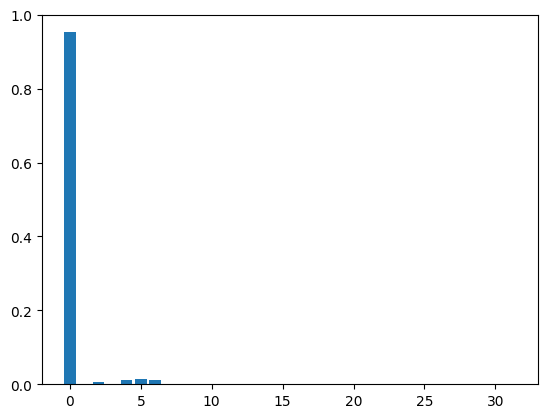

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
# Create a regressor object
dt_regressor = DecisionTreeRegressor(random_state = 0) 
  
# Fit the regressor with X_train and y_train
dt_regressor.fit(X_train, y_train)
# Get importance
importance = dt_regressor.feature_importances_
# Summarize feature importance
for i,v in enumerate(importance):
  
 print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



In [ ]:
print(dt_regressor.feature_importances_)

[9.52525538e-01 1.93656178e-03 5.24087052e-03 1.68526994e-03
 1.21844163e-02 1.33435410e-02 1.09735027e-02 4.59228904e-04
 4.62440456e-04 2.21687159e-05 3.17653860e-05 4.91087979e-06
 0.00000000e+00 2.96569754e-05 2.81056993e-04 9.77452717e-05
 0.00000000e+00 3.56211962e-04 0.00000000e+00 3.46071501e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.03287648e-04 4.07892015e-05 0.00000000e+00 0.00000000e+00
 2.86467988e-06 0.00000000e+00 0.00000000e+00 8.35655134e-05]


In [ ]:
print(dt_regressor.score(X_test,y_test))

0.904316666069866


We assign the coefficients and column name to a dataframe.

In [ ]:
v = pd.DataFrame(importance, columns=['Coefficient'])
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [ ]:
coeff_df = pd.concat([w,v], axis=1, join = 'inner')
coeff_df

,Attribute,Coefficient
0,User Rating Count,0.952526
1,Price,0.001937
2,In-app Purchases,0.005241
3,Age Rating,0.001685
4,Size,0.012184
5,Original release days,0.013344
6,Latest update days,0.010974
7,Subtitle_Has Subtitle,0.000459
8,Subtitle_No Subtitle,0.000462
9,Languages_English,0.000022


Based on the Decision Tree Regression results, it appears that the variable with the most significant impact on the app's rating is the `User Rating Count` with coefficient 0.954512 that is nearly 1 or 100% it suggests that this variable is highly influential in determining the target variable `Average User Rating`. The high coefficient indicates that `User Rating Count` plays a significant role and is a crucial factor in accurately predicting the app's rating. `User Rating Count` itself indicates the number of users who have already rated the app.

##6. How do microtransactions affect rating?


> [Microtransactions](https://en.wikipedia.org/wiki/Microtransaction) are a business model where users can purchase virtual goods with micropayments, most commonly provided through a custom store interface placed inside the app for which the items are being sold.

To determine the impact of microtransactions on ratings, the first step is to ensure that the data for "Average User Rating" and "In-app Purchases" is converted to a float data type.

In [ ]:
df['Average User Rating'] = [float(i) for i in df['Average User Rating']]
df['In-app Purchases'] = [float(i) for i in df['In-app Purchases']]

 
We create a scatter plot to visualize the relationship between `Average User Rating` and `In-app Purchases`.

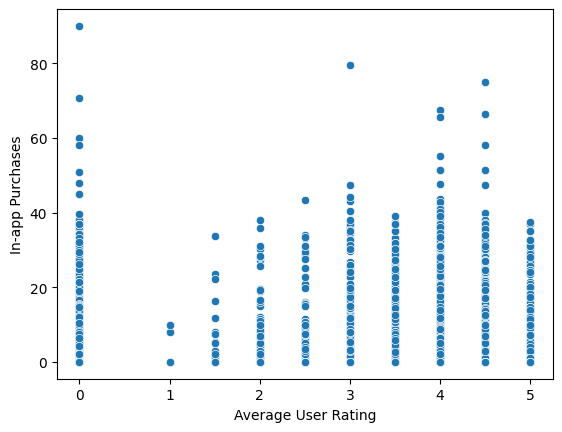

In [ ]:
sns.scatterplot(x = "Average User Rating", y = 'In-app Purchases',data = df)
# Show the plot
plt.show()

We filter the application that contains a microtransaction and assign it to the variable `df_micro`. We assign the applications that do not have a microtransaction to the variable `df_free`.

In [ ]:
df_micro = df[(df.Price != 0.) & (df['Average User Rating'] !=0)]
df_free = df[(df.Price == 0.) & (df['Average User Rating'] !=0)]


We calculate the average rating of the applications that contain microtransactions

In [ ]:
df_micro['Average User Rating'].mean()

4.008613617719442


We calculate the average rating of the applications that do not contain microtransactions

In [ ]:
df_free['Average User Rating'].mean()

4.072499601212314

We calculate the mean rating of all the applications that have a non-zero rating.

In [ ]:
df['Average User Rating'][df['Average User Rating'] != 0].mean()

4.062099358974359

Based on the analysis above, it is observed that the completely free app has a slightly higher rating than the app with a microtransaction. However, the difference is minimal, with a value of less than 0.1.

##7. What variables affect age restrictions?

To identify the variables that affect age restrictions, the first step is to examine the unique values of the `Age Rating` variable.

In [ ]:
df['Age Rating'].unique()

array([ 4,  9, 12, 17])

Next, since the `Age Rating` variable has only four ordered values, we can assign the data to a categorical variable using `pd.Categorical()` function.

In [ ]:
df['Age Rating'] = pd.Categorical(df['Age Rating'], categories=[4, 9, 12, 17], ordered=True)

We can assign `X` to represent the independent column or feature matrix. To do this, we can drop the unnecessary columns from the dataframe to create `X`.

In [ ]:
X = df.drop(['Age Rating','URL','ID','Name','Icon URL','Description','Developer','Genres','Original Release Date','Current Version Release Date','Original release months','Original release years','Latest update years','Latest update months'], axis=1)
y = df['Age Rating']

To split the data into training and testing sets, we can use the `train_test_split` function.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

We normalize the data using the `MinMaxScaler()` function.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In order to introduce more variations in the modeling process, we have switched from using the `DecisionTreeRegressor` to employing the `RandomForestRegressor` to determine the variables that impact the app rating. 

Feature: 0, Score: 0.03338
Feature: 1, Score: 0.07703
Feature: 2, Score: 0.02870
Feature: 3, Score: 0.09290
Feature: 4, Score: 0.34506
Feature: 5, Score: 0.19149
Feature: 6, Score: 0.18817
Feature: 7, Score: 0.00834
Feature: 8, Score: 0.00777
Feature: 9, Score: 0.00197
Feature: 10, Score: 0.00176
Feature: 11, Score: 0.00071
Feature: 12, Score: 0.00006
Feature: 13, Score: 0.00346
Feature: 14, Score: 0.00392
Feature: 15, Score: 0.00057
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00395
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00040
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00082
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00083
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00191
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00055
Feature: 28, Score: 0.00514
Feature: 29, Score: 0.00009
Feature: 30, Score: 0.00037
Feature: 31, Score: 0.00063


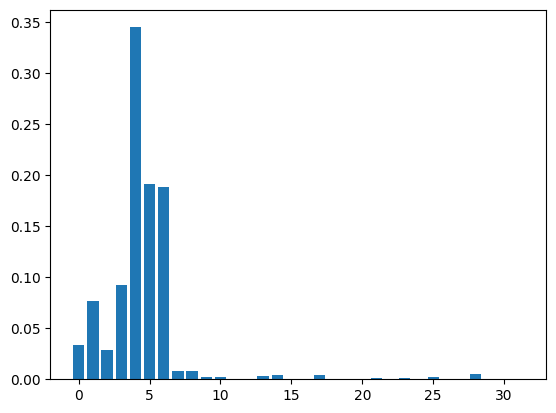

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Lastly, we assign the feature value and column name to a dataframe.

In [ ]:
v = pd.DataFrame(importance, columns=['Coefficient'])
w = pd.DataFrame(X.columns, columns=['Attribute'])

In [ ]:
coeff_df = pd.concat([w,v], axis=1, join = 'inner')
coeff_df

,Attribute,Coefficient
0,Average User Rating,0.033381
1,User Rating Count,0.077032
2,Price,0.028701
3,In-app Purchases,0.092899
4,Size,0.345062
5,Original release days,0.191494
6,Latest update days,0.188172
7,Subtitle_Has Subtitle,0.008344
8,Subtitle_No Subtitle,0.007767
9,Languages_English,0.001967


According to the results from the random forest regression analysis, it is discovered that the variable labeled as `feature 4` specifically the `Size` has the most substantial influence on the app's rating with coefficient 0.346705. This feature represents the storage space occupied by the app. 

The feature labeled as Size stands out due to its notably higher coefficient compared to other features, as most of the other features have coefficients less than 0.1. This suggests that Size has a relatively stronger influence on the target variable in the regression analysis.


# Acknowledgements and Recommendations
The dataset was uploaded to [Kaggle](https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games)
 by the user [Tristan](https://www.kaggle.com/tristan581) around August 2019.

Original data is extracted using the iTunes API and the App Store sitemap.


For future analysis, I would recommend conducting a more in-depth investigation into the variables that impact the age rating. Given that Size appears to be influential, it would be worthwhile to explore whether there is a correlation between stricter age ratings and larger app sizes or the presence of multiple features within the app. This deeper analysis can provide valuable insights into the relationship between app characteristics and age restrictions.


---


# Data License
This data is licensed under [Creative Commons Attribution-Universal (CC0 1.0)](https://creativecommons.org/publicdomain/zero/1.0/). I hereby affirm that I do not possess any material nor monetary benefit by doing this project.

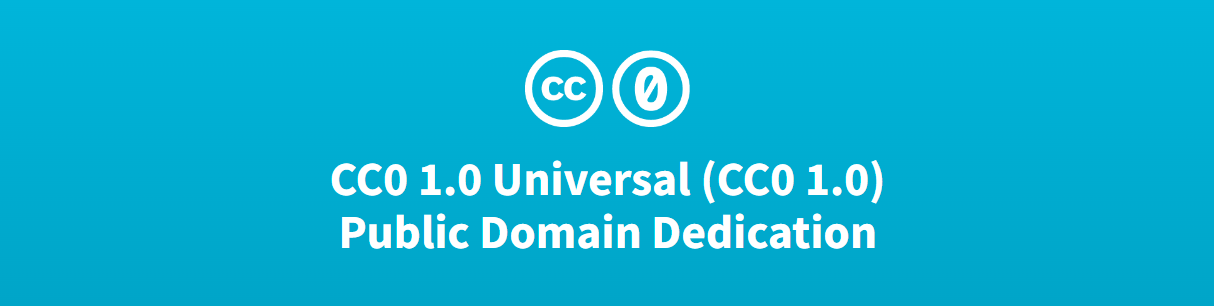